<a href="https://colab.research.google.com/github/AfzalKamboh/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Internship_Datasets/archive.zip

Archive:  /content/drive/MyDrive/Internship_Datasets/archive.zip
  inflating: credit.csv              


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("credit.csv")
data.head(50)

,AcountNumber,CVV,CustomerAge,Gender,Marital Status,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt
5,1243532523,310,23.0,Male,Married,White,MasterCard,International,524019,118086,1,Lagos
6,1258961564,426,27.0,Male,Married,Gold,Verve,Local,367905,258085,0,Other
7,1243401285,663,25.0,Female,Unknown,Gold,Verve,Local,597975,194062,1,Abuja
8,1242065386,319,22.0,Male,Single,Gold,Verve,International,773932,119074,1,Ota
9,1261095164,482,18.0,Male,Single,White,Visa,International,399983,165251,1,Abuja


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CustomerAge                28246 non-null  float64
 3   Gender                     37097 non-null  object 
 4   Marital Status             37097 non-null  object 
 5   CardColour                 37097 non-null  object 
 6   CardType                   37097 non-null  object 
 7   Domain                     37097 non-null  object 
 8   Amount                     37097 non-null  int64  
 9   AverageIncomeExpendicture  37097 non-null  int64  
 10  Outcome                    37097 non-null  int64  
 11  Customer_City_Address      37097 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.4+ MB


In [ ]:
data.shape

(37097, 12)

In [ ]:
data.columns

Index(['AcountNumber', 'CVV', 'CustomerAge', 'Gender', 'Marital Status',
       'CardColour', 'CardType', 'Domain', 'Amount',
       'AverageIncomeExpendicture', 'Outcome', 'Customer_City_Address'],
      dtype='object')

In [ ]:
data.Outcome.unique()

array([0, 1])

In [ ]:
data.Outcome.value_counts()

1    27370
0     9727
Name: Outcome, dtype: int64

Non-fraud transactions: 26.22%
Fraud transactions: 73.78%


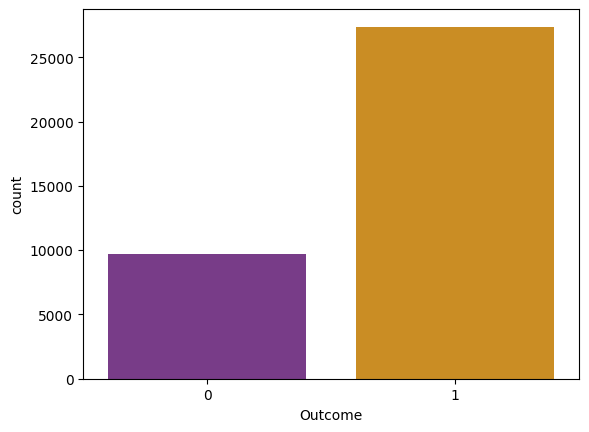

In [ ]:
sns.countplot(x='Outcome', data=data, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(data.Outcome.value_counts()[0]/len(data)*100.0,2)))
print('Fraud transactions: {}%'.format(round(data.Outcome.value_counts()[1]/len(data)*100.0,2)))

In [ ]:
fraudulent_data = data[data['Outcome'] == 1]
fraudulent_data['Amount'].describe()

count     27370.000000
mean     647113.580234
std      224363.794334
min      150070.000000
25%      484608.250000
50%      669625.000000
75%      835785.750000
max      999956.000000
Name: Amount, dtype: float64

In [ ]:
fraudulent_data = data[data['Outcome'] == 0]
fraudulent_data['Amount'].describe()

count      9727.000000
mean     277735.534286
std      129439.270516
min      100003.000000
25%      160572.000000
50%      256232.000000
75%      384818.500000
max      599320.000000
Name: Amount, dtype: float64

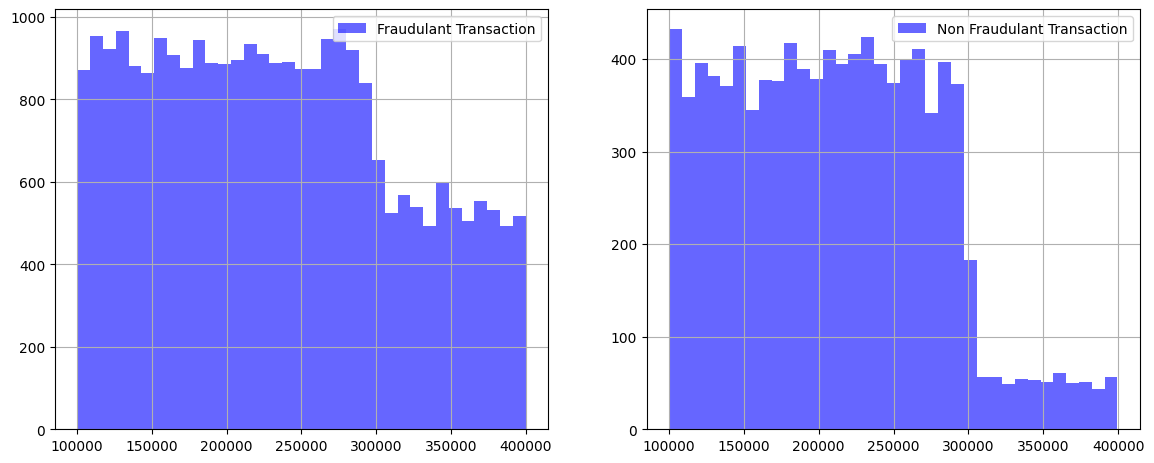

In [ ]:
# data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Outcome == 1].AverageIncomeExpendicture.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Outcome == 0].AverageIncomeExpendicture.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

<ipython-input-14-1da9925ac7e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


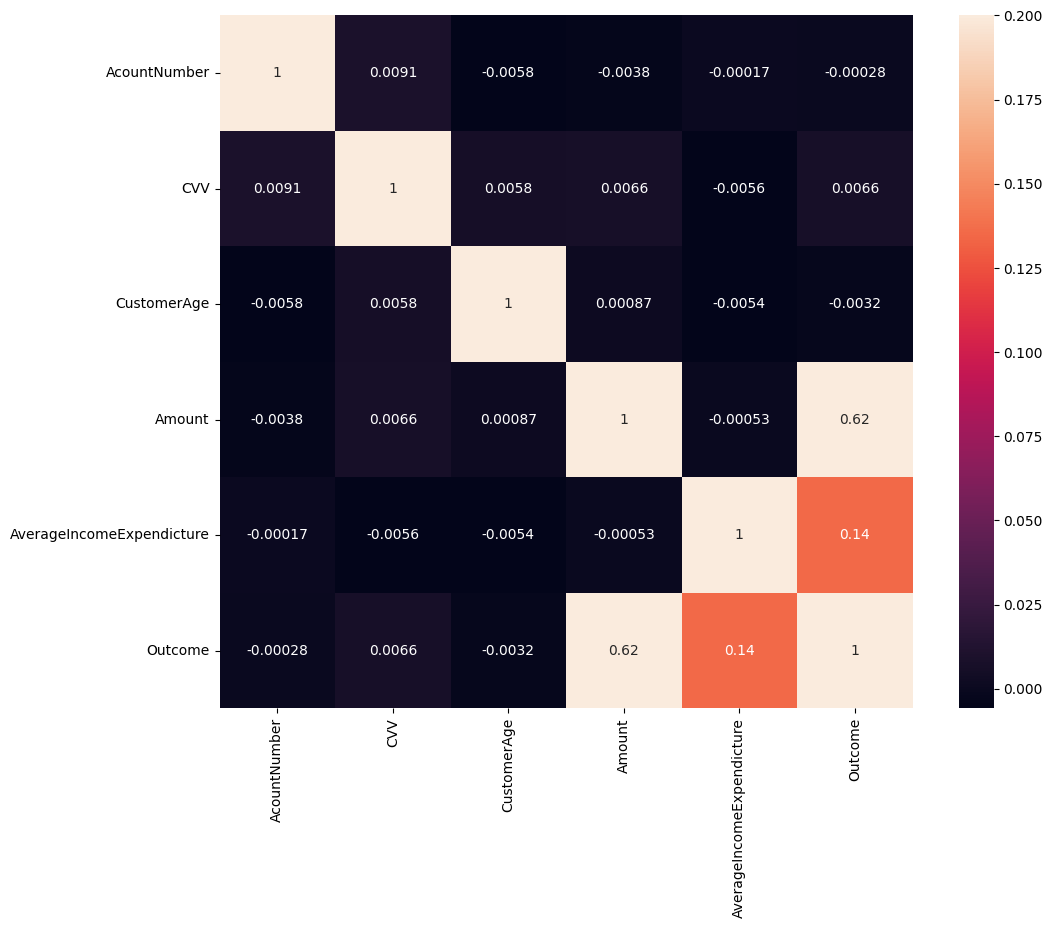

In [ ]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .2, square = True,annot=True)
plt.show()

In [ ]:
print(data.columns)

Index(['AcountNumber', 'CVV', 'CustomerAge', 'Gender', 'Marital Status',
       'CardColour', 'CardType', 'Domain', 'Amount',
       'AverageIncomeExpendicture', 'Outcome', 'Customer_City_Address'],
      dtype='object')


In [ ]:
X = data.drop(['AcountNumber', 'CVV','CardColour', 'CardType', 'Domain','Outcome', 'Customer_City_Address'],axis=1)
y=data['Outcome']

In [ ]:
#Label Encoding on the Package attribute
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
X['Gender'] = labelencoder.fit_transform(X['Gender'])
X['Marital Status'] = labelencoder.fit_transform(X['Marital Status'])
X

,CustomerAge,Gender,Marital Status,Amount,AverageIncomeExpendicture
0,28.0,1,1,129282,170919
1,25.0,1,2,574384,329353
2,21.0,0,1,190766,292922
3,26.0,1,3,130395,145444
4,28.0,0,1,685145,295990
...,...,...,...,...,...
37092,62.0,0,1,534813,198167
37093,20.0,1,0,178903,147133
37094,67.0,1,1,301594,256814
37095,58.0,0,3,212826,113439


In [ ]:
y

0        0
1        1
2        0
3        0
4        1
        ..
37092    1
37093    0
37094    1
37095    0
37096    0
Name: Outcome, Length: 37097, dtype: int64

In [ ]:
X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
w_p=y_train.to_numpy()
w_n=y_test.to_numpy()

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.9569118  -1.29089005 -0.62612222 -1.02948958  0.00404468]
 [        nan -1.29089005  0.73197083  0.3012906   0.7043212 ]
 [-0.90718052 -1.29089005 -1.98421526  0.84760264  1.28626824]
 ...
 [ 1.47992079  0.77465931 -0.62612222 -0.72424294  0.41704548]
 [        nan  0.77465931  0.73197083 -1.30980372 -0.14248683]
 [ 1.08207057 -1.29089005 -0.62612222 -0.10610409  1.17546099]]
[[-0.80771797  0.77465931 -0.62612222 -0.6450047  -0.47573173]
 [-0.06174881  0.77465931 -1.98421526  0.92680633  0.27324933]
 [-0.70825541  0.77465931  0.73197083 -0.61244966 -1.38318616]
 ...
 [-0.45959903  0.77465931  0.73197083  1.69211451 -0.14046064]
 [-0.01201753  0.77465931 -0.62612222  1.12822383 -0.03218612]
 [-0.70825541 -1.29089005  0.73197083  1.58807043  0.68551563]]
7060     0
36599    1
4279     1
15461    1
17984    1
        ..
15691    0
20943    1
30926    1
36696    1
24386    1
Name: Outcome, Length: 29677, dtype: int64
710      0
16049    1
10110    1
7232     1
4482     1
        ..
30

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [ ]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/10
163/163 [==============================] - 3s 10ms/step - loss: nan - fn: 15413.0000 - fp: 0.0000e+00 - tn: 5360.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_fn: 3840.0000 - val_fp: 0.0000e+00 - val_tn: 1354.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: nan - fn: 15413.0000 - fp: 0.0000e+00 - tn: 5360.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_fn: 3840.0000 - val_fp: 0.0000e+00 - val_tn: 1354.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: nan - fn: 15413.0000 - fp: 0.0000e+00 - tn: 5360.0000 - tp: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: nan - val_fn: 3840.0000 - val_fp: 0.0000e+00 - val_tn: 1354.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 -